# Final Imputation

In [35]:
import pandas as pd
import glob
import re
#pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',150)
pd.options.display.float_format='{:,.2f}'.format

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
import numpy as np

In [4]:
final_df=pd.read_csv("final_data_without_imputation.csv")

### percentage of missing value 

In [5]:
#Storinf the persentage of the missing values in a dectionary
feat=dict((final_df.isnull().mean()*100))


In [9]:
#Features have more than 80% of missing Values
feature_have_lessthan_80={k: v for k, v in feat.items() if v<80}

In [11]:
# Take only the featrures that has less than 80% and store them in a list
final_features=list(feature_have_lessthan_80.keys())

In [12]:
feature_have_lessthan_50=list({k: v for k, v in feature_have_lessthan_80.items() if (v<51 and v>5)}.keys())
feature_have_Higherthan_50=list({k: v for k, v in feature_have_lessthan_80.items() if v>=51}.keys())

In [13]:
nearly_cleaned=list({k: v for k, v in feature_have_lessthan_80.items() if v<5}.keys())

In [14]:
final_data_to_be_imputed=final_df[final_features]
final_data_to_be_imputed.shape

(61, 22)

In [15]:
final_data_to_be_imputed.head()

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,land_area_equipped_for_irrigation_ha,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,methane_emissions_kt_of_co2_equivalent,...,potential_evapotranspiration_annual_kg_m2,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y,rainfall_mm,mintemp_c,maxtemp_c,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha
0,1960,"26,632,891.00",NaN,NaN,NaN,"16,054.13",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,"27,366,239.00","25,680.00","4,868,000.00","2,905.70","17,088.22","2,568.00",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,770,680.00","160,804.00","1,723,824.00"
2,1962,"28,112,258.00","25,050.00","4,997,000.00","3,259.60","18,595.36","2,505.00",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,799,279.00","171,597.00","1,975,708.00"
3,1963,"28,871,383.00","24,900.00","5,134,000.00","3,312.80","21,554.63","2,490.00",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,922,435.00","169,710.00","1,944,683.00"
4,1964,"29,644,875.00","25,060.00","5,271,000.00","3,330.10","25,522.32","2,506.00",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,709,919.00","168,039.00","1,907,398.00"


##  using KNN  to impute the data

In [16]:
clean=final_data_to_be_imputed[nearly_cleaned]

imp_mean = KNNImputer(n_neighbors=8)
imputed_training=imp_mean.fit_transform(clean)

In [17]:
imputed=pd.DataFrame(imputed_training,columns=list(clean.columns) )

In [18]:
c0=list(imputed.columns)

In [19]:
clean=final_data_to_be_imputed[feature_have_lessthan_50]
clean[c0]=imputed
# start the MICE training
clean.shape

(61, 15)

In [20]:
imp_mean = KNNImputer(n_neighbors=12)
imputed_training=imp_mean.fit_transform(clean)

In [21]:
imputed=pd.DataFrame(imputed_training,columns=list(clean.columns) )

In [22]:
c50=list(imputed.columns)

In [23]:
clean=final_data_to_be_imputed[feature_have_Higherthan_50]
clean[c50]=imputed
# start the MICE training
clean.shape

(61, 22)

In [24]:
imp_mean = KNNImputer(n_neighbors=12)
imputed_training=imp_mean.fit_transform(clean)

In [25]:
imputed=pd.DataFrame(imputed_training,columns=list(clean.columns) )

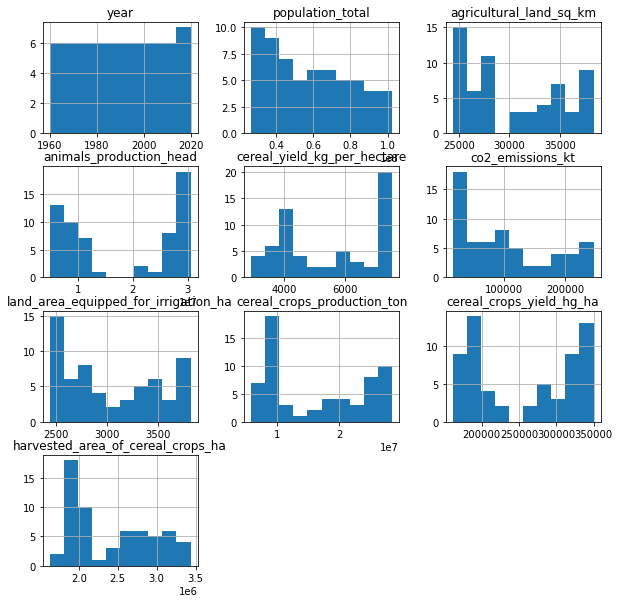

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pd.plotting.hist_frame(imputed[list(nearly_cleaned)]);

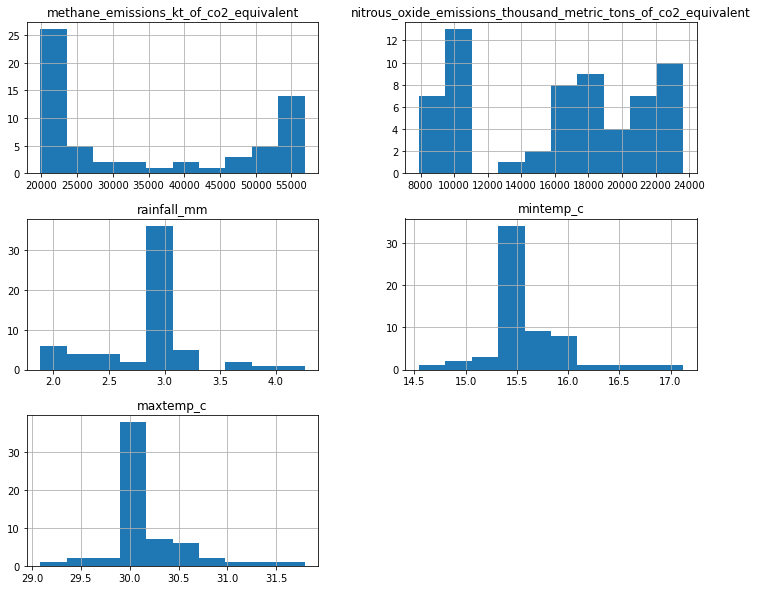

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

pd.plotting.hist_frame(imputed[feature_have_lessthan_50]);

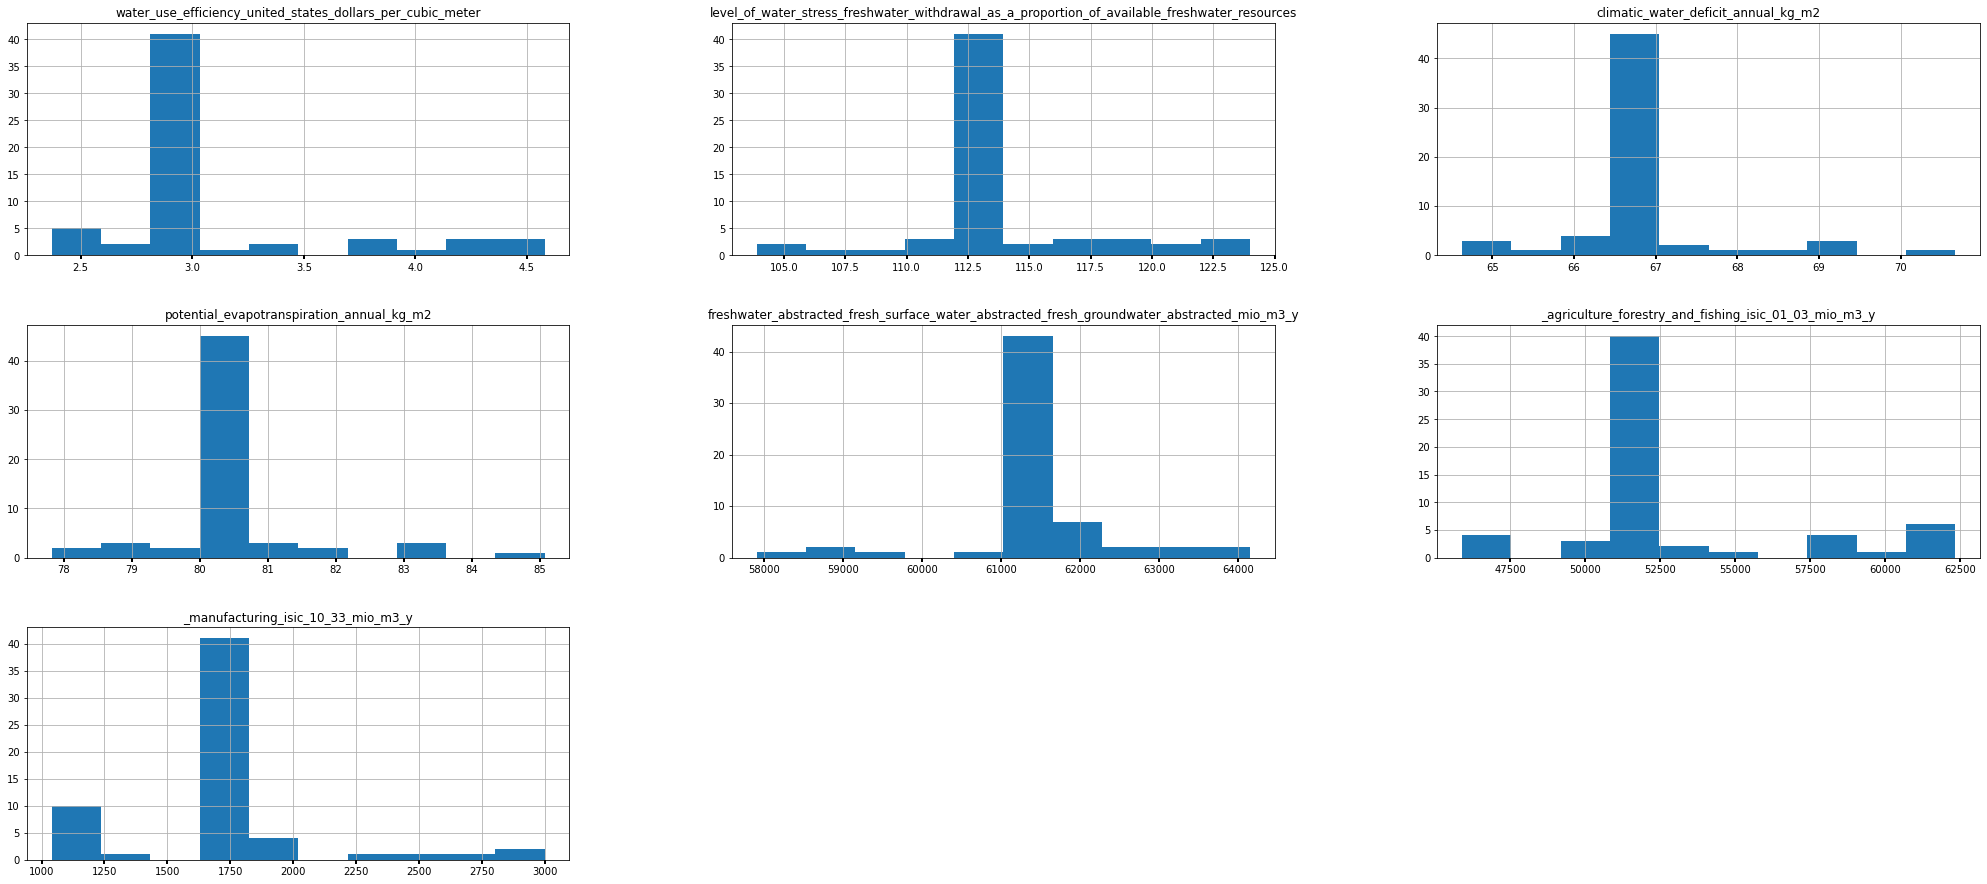

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 35, 15


pd.plotting.hist_frame(imputed[feature_have_Higherthan_50]);


The last disterbution is not goos as it is not nearly as the previous ones.

In [29]:
final_data_to_be_imputed[nearly_cleaned].describe()

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,land_area_equipped_for_irrigation_ha,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha
count,61.00,61.00,58.00,59.00,58.00,59.00,58.00,59.00,59.00,59.00
mean,"1,990.00","58,277,667.08","30,267.78","17,933,812.75","5,455.93","95,538.16","3,019.93","16,487,122.76","257,310.64","2,411,109.97"
std,17.75,"22,191,817.18","4,697.83","10,320,162.73","1,574.71","71,175.90",464.40,"7,719,126.39","69,316.46","520,554.98"
min,"1,960.00","26,632,891.00","24,347.40","4,868,000.00","2,905.70","16,054.13","2,434.00","5,770,680.00","160,804.00","1,625,595.00"
25%,"1,975.00","38,549,133.00","25,735.00","7,717,912.00","3,954.53","29,370.84","2,573.50","9,459,350.50","189,145.00","1,943,141.00"
50%,"1,990.00","56,134,478.00","28,535.00","12,607,000.00","5,475.35","74,810.47","2,853.50","15,134,913.00","270,130.00","2,283,426.00"
75%,"2,005.00","75,523,576.00","34,817.50","28,345,438.50","7,155.85","136,965.00","3,458.75","24,534,082.50","329,157.50","2,758,755.50"
max,"2,020.00","102,334,403.00","38,359.69","30,508,486.00","7,556.20","246,260.00","3,823.00","28,587,740.00","349,995.00","3,435,314.00"


In [30]:
imputed[nearly_cleaned].describe()

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,land_area_equipped_for_irrigation_ha,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,"1,990.00","58,277,667.08","30,439.82","17,878,513.55","5,480.51","99,725.27","3,037.22","16,503,789.45","257,151.14","2,414,874.14"
std,17.75,"22,191,817.18","4,785.71","10,340,971.25","1,590.21","73,640.70",473.41,"7,777,510.69","69,781.93","526,121.30"
min,"1,960.00","26,632,891.00","24,347.40","4,868,000.00","2,905.70","16,054.13","2,434.00","5,770,680.00","160,804.00","1,625,595.00"
25%,"1,975.00","38,549,133.00","25,810.00","7,699,588.00","3,951.30","31,099.83","2,581.00","9,230,264.00","188,166.00","1,941,599.00"
50%,"1,990.00","56,134,478.00","28,550.00","12,607,000.00","5,613.00","86,430.00","2,855.00","15,134,913.00","270,130.00","2,283,426.00"
75%,"2,005.00","75,523,576.00","35,230.00","28,343,397.00","7,166.60","160,590.00","3,516.00","24,801,497.00","329,459.00","2,761,724.00"
max,"2,020.00","102,334,403.00","38,359.69","30,508,486.00","7,556.20","246,260.00","3,823.00","28,587,740.00","349,995.00","3,435,314.00"


When looking at the statistical values, we can see that there is nearly no change. As the value we have imputed are very few. therefore, the accuracy of imputation will be very high 

In [78]:
final_data_to_be_imputed[feature_have_lessthan_50].describe()

,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
count,49.00,49.00,30.00,30.00,30.00
mean,"36,890.91","17,140.40",2.75,15.73,30.33
std,"14,575.74","4,832.38",0.61,0.52,0.54
min,"19,836.80","7,888.60",1.88,14.54,29.08
25%,"21,802.00","15,590.00",2.29,15.45,30.04
50%,"34,550.00","17,876.65",2.75,15.77,30.31
75%,"52,150.00","21,270.00",3.11,15.94,30.66
max,"56,870.00","23,650.00",4.26,17.12,31.79


In [79]:
imputed[feature_have_lessthan_50].describe()

,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
count,61.00,61.00,61.00,61.00,61.00
mean,"34,869.71","16,136.82",2.82,15.53,30.12
std,"14,822.84","5,213.74",0.43,0.41,0.42
min,"19,836.80","7,888.60",1.88,14.54,29.08
25%,"20,889.75","9,960.33",2.78,15.34,29.93
50%,"26,028.40","17,170.00",2.89,15.34,29.93
75%,"50,700.00","20,980.00",2.89,15.77,30.31
max,"56,870.00","23,650.00",4.26,17.12,31.79


Here, we also can see that the distirbution are quite good. 

In [81]:
final_data_to_be_imputed[feature_have_Higherthan_50].describe()

,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y
count,19.00,19.00,20.00,20.00,13.00,17.00,17.00
mean,3.41,114.74,67.04,80.73,"61,434.46","54,681.18","1,647.53"
std,0.81,6.13,1.62,1.82,"2,057.73","6,521.39",746.95
min,2.37,103.90,64.63,77.82,"57,914.00","45,900.00","1,040.00"
25%,2.62,110.34,65.97,79.66,"59,484.00","49,500.00","1,100.00"
50%,3.28,115.60,66.66,80.42,"62,200.00","53,000.00","1,200.00"
75%,4.24,119.85,67.92,81.85,"63,000.00","61,500.00","2,350.00"
max,4.58,124.00,70.67,85.07,"64,149.00","62,350.00","2,999.00"


In [82]:
imputed[feature_have_Higherthan_50].describe()

,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,3.07,113.79,66.87,80.41,"61,401.79","52,861.69","1,695.09"
std,0.53,3.53,0.92,1.05,926.06,"3,870.21",388.42
min,2.37,103.90,64.63,77.82,"57,914.00","45,900.00","1,040.00"
25%,2.87,113.13,66.79,80.25,"61,354.00","51,594.17","1,700.67"
50%,2.87,113.13,66.79,80.25,"61,354.00","51,594.17","1,700.67"
75%,2.87,113.13,66.79,80.25,"61,354.00","51,594.17","1,700.67"
max,4.58,124.00,70.67,85.07,"64,149.00","62,350.00","2,999.00"


Here, there is a difference as it should be excpected. Therefore, we can see in the previous figure that the disterbutions are difference from the other. 

## Imputation using Mice

In [83]:
from impyute.imputation.cs import mice

Clean=final_data_to_be_imputed[nearly_cleaned]
# start the MICE training
imputed_training=mice(Clean.values)

In [84]:
imputed=pd.DataFrame(imputed_training,columns=list(Clean.columns) )

In [85]:
c0=list(imputed.columns)

In [86]:
clean=final_data_to_be_imputed[feature_have_lessthan_50]
clean[c0]=imputed
# start the MICE training
clean.shape

(61, 15)

In [87]:
imputed_training=mice(clean.values)

In [88]:
imputed=pd.DataFrame(imputed_training,columns=list(clean.columns) )

In [89]:
c50=list(imputed.columns)

In [90]:
clean=final_data_to_be_imputed[feature_have_Higherthan_50]
clean[c50]=imputed
# start the MICE training
clean.shape

(61, 22)

In [91]:
imputed_training=mice(clean.values)

In [92]:
imputed=pd.DataFrame(imputed_training,columns=list(clean.columns) )

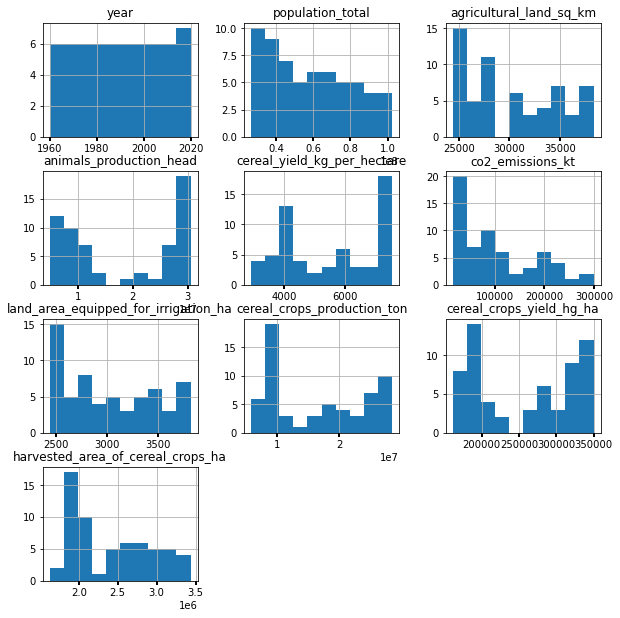

In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pd.plotting.hist_frame(imputed[list(nearly_cleaned)]);

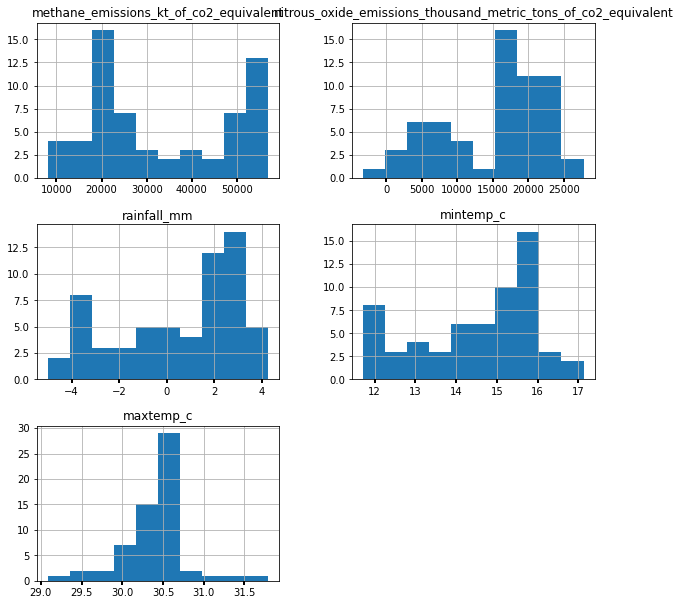

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pd.plotting.hist_frame(imputed[feature_have_lessthan_50]);

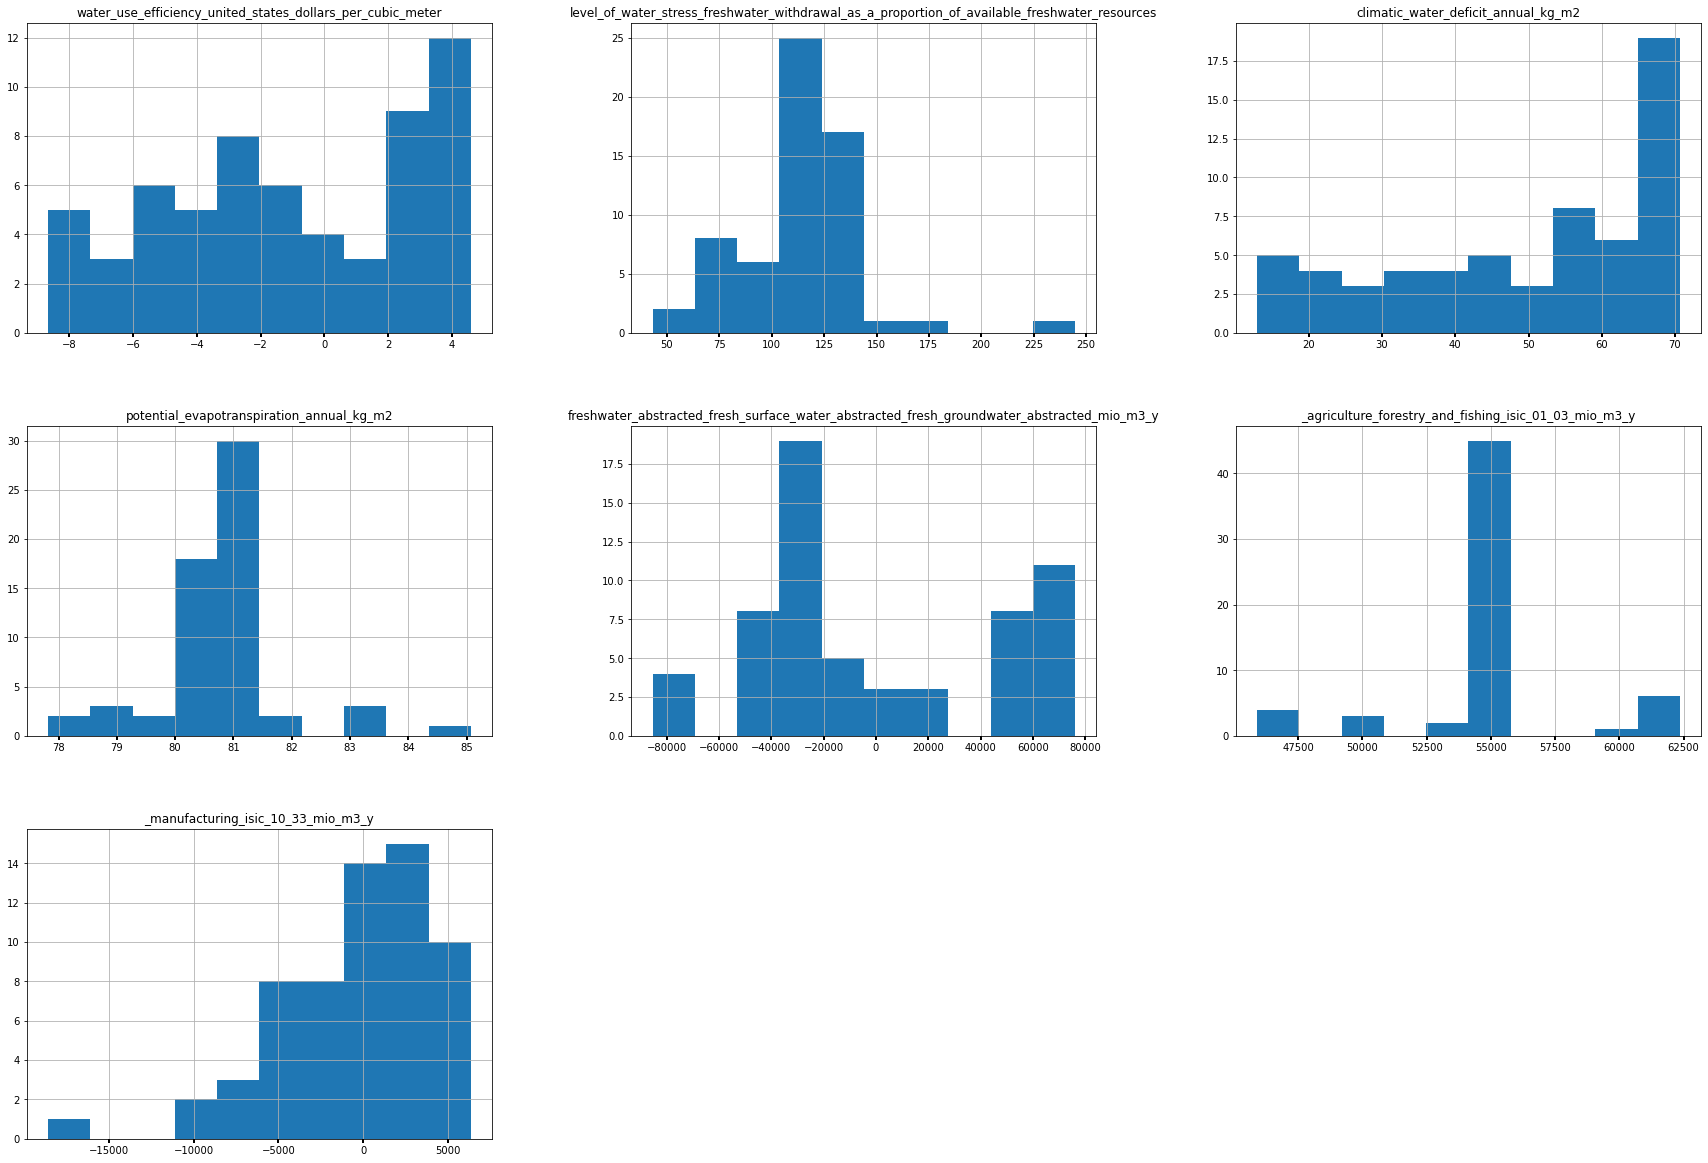

In [96]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
pd.plotting.hist_frame(imputed[feature_have_Higherthan_50]);

Here we can see that all the disterbutions are quite simmelar to each other. 

In [98]:
final_data_to_be_imputed[nearly_cleaned].describe()

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,land_area_equipped_for_irrigation_ha,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha
count,61.00,61.00,58.00,59.00,58.00,59.00,58.00,59.00,59.00,59.00
mean,"1,990.00","58,277,667.08","30,267.78","17,933,812.75","5,455.93","95,538.16","3,019.93","16,487,122.76","257,310.64","2,411,109.97"
std,17.75,"22,191,817.18","4,697.83","10,320,162.73","1,574.71","71,175.90",464.40,"7,719,126.39","69,316.46","520,554.98"
min,"1,960.00","26,632,891.00","24,347.40","4,868,000.00","2,905.70","16,054.13","2,434.00","5,770,680.00","160,804.00","1,625,595.00"
25%,"1,975.00","38,549,133.00","25,735.00","7,717,912.00","3,954.53","29,370.84","2,573.50","9,459,350.50","189,145.00","1,943,141.00"
50%,"1,990.00","56,134,478.00","28,535.00","12,607,000.00","5,475.35","74,810.47","2,853.50","15,134,913.00","270,130.00","2,283,426.00"
75%,"2,005.00","75,523,576.00","34,817.50","28,345,438.50","7,155.85","136,965.00","3,458.75","24,534,082.50","329,157.50","2,758,755.50"
max,"2,020.00","102,334,403.00","38,359.69","30,508,486.00","7,556.20","246,260.00","3,823.00","28,587,740.00","349,995.00","3,435,314.00"


In [99]:
imputed[nearly_cleaned].describe()

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,land_area_equipped_for_irrigation_ha,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,"1,990.00","58,277,667.08","30,272.41","17,855,137.83","5,484.91","101,839.96","3,020.67","16,503,757.31","257,848.93","2,411,516.73"
std,17.75,"22,191,817.18","4,579.41","10,165,755.75","1,547.79","78,050.75",452.66,"7,596,615.08","68,265.49","511,903.12"
min,"1,960.00","26,632,891.00","24,347.40","4,868,000.00","2,905.70","16,054.13","2,434.00","5,770,680.00","160,804.00","1,625,595.00"
25%,"1,975.00","38,549,133.00","25,810.00","7,736,236.00","3,964.20","31,099.83","2,581.00","9,688,437.00","190,124.00","1,944,683.00"
50%,"1,990.00","56,134,478.00","28,550.00","13,076,286.74","5,613.00","86,430.00","2,855.00","15,249,370.18","270,130.00","2,370,150.48"
75%,"2,005.00","75,523,576.00","34,780.00","28,343,397.00","7,148.50","160,590.00","3,422.00","24,266,668.00","328,856.00","2,755,787.00"
max,"2,020.00","102,334,403.00","38,359.69","30,508,486.00","7,556.20","298,318.05","3,823.00","28,587,740.00","349,995.00","3,435,314.00"


When looking at the statistical values, we can see that there is nearly no change. As the value we have imputed are very few. therefore, the accuracy of imputation will be very high 

In [100]:
final_data_to_be_imputed[feature_have_lessthan_50].describe()

,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
count,49.00,49.00,30.00,30.00,30.00
mean,"36,890.91","17,140.40",2.75,15.73,30.33
std,"14,575.74","4,832.38",0.61,0.52,0.54
min,"19,836.80","7,888.60",1.88,14.54,29.08
25%,"21,802.00","15,590.00",2.29,15.45,30.04
50%,"34,550.00","17,876.65",2.75,15.77,30.31
75%,"52,150.00","21,270.00",3.11,15.94,30.66
max,"56,870.00","23,650.00",4.26,17.12,31.79


In [101]:
imputed[feature_have_lessthan_50].describe()

,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
count,61.00,61.00,61.00,61.00,61.00
mean,"33,430.91","15,155.57",0.58,14.55,30.41
std,"15,749.73","7,188.82",2.62,1.45,0.39
min,"8,061.76","-3,270.52",-5.01,11.72,29.08
25%,"20,993.10","9,028.22",-1.40,13.45,30.29
50%,"26,028.40","17,170.00",1.88,14.97,30.47
75%,"49,970.00","20,980.00",2.78,15.77,30.60
max,"56,870.00","27,763.23",4.26,17.12,31.79


Here, we also can see that the distirbution are quite good. 

In [102]:
final_data_to_be_imputed[feature_have_Higherthan_50].describe()

,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y
count,19.00,19.00,20.00,20.00,13.00,17.00,17.00
mean,3.41,114.74,67.04,80.73,"61,434.46","54,681.18","1,647.53"
std,0.81,6.13,1.62,1.82,"2,057.73","6,521.39",746.95
min,2.37,103.90,64.63,77.82,"57,914.00","45,900.00","1,040.00"
25%,2.62,110.34,65.97,79.66,"59,484.00","49,500.00","1,100.00"
50%,3.28,115.60,66.66,80.42,"62,200.00","53,000.00","1,200.00"
75%,4.24,119.85,67.92,81.85,"63,000.00","61,500.00","2,350.00"
max,4.58,124.00,70.67,85.07,"64,149.00","62,350.00","2,999.00"


In [103]:
imputed[feature_have_Higherthan_50].describe()

,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,-1.05,114.95,49.38,80.73,-972.24,"54,668.13",-189.95
std,4.03,29.47,18.10,1.03,"47,090.18","3,367.90","4,644.91"
min,-8.66,43.14,12.92,77.82,"-85,393.03","45,900.00","-18,571.18"
25%,-4.20,100.94,35.48,80.72,"-34,853.13","54,612.44","-2,749.63"
50%,-1.48,116.64,54.60,80.72,"-22,179.99","54,655.17","1,200.00"
75%,2.68,129.29,65.85,80.73,"58,070.44","54,719.21","2,800.00"
max,4.59,244.87,70.67,85.07,"76,218.54","62,350.00","6,338.62"


Here, there is a difference as it should be excpected. However, the values comparing to other disterbutions in the dataset,seems to be quite good and right.

## Summary

the mice did better imputation than the Knn. 

In [105]:
imputed.to_csv( "Imputed_using_mice",index=False)